# Audio Representations

How to represent audio in the format that captures the meaning signals for human hearing.


In [4]:
from IPython.display import (
    Audio, 
    display
)
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Sound Data

In [2]:
data, sampling_rate = librosa.load("../data/jfk.flac")
print(sampling_rate)    # 22050 which is half of the CD sampling rate (why?)
display(Audio(data=data, rate=sampling_rate))

In [10]:
data.shape[0] / 22500

10.78

# Sound Wave


# Audio Wave (Time Series)

Amplitude of the signal on the y-axis and time along the x-axis

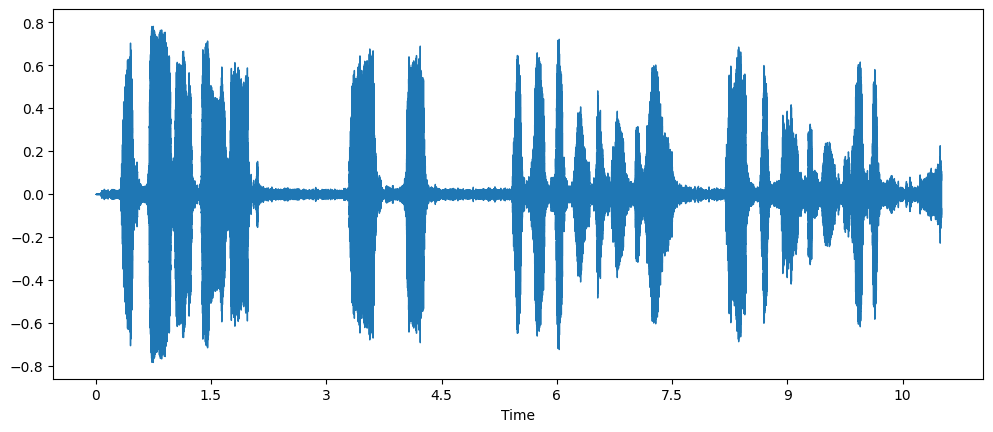

In [16]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(y=data, sr=sampling_rate)

# Frequency Spectrum

The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis.

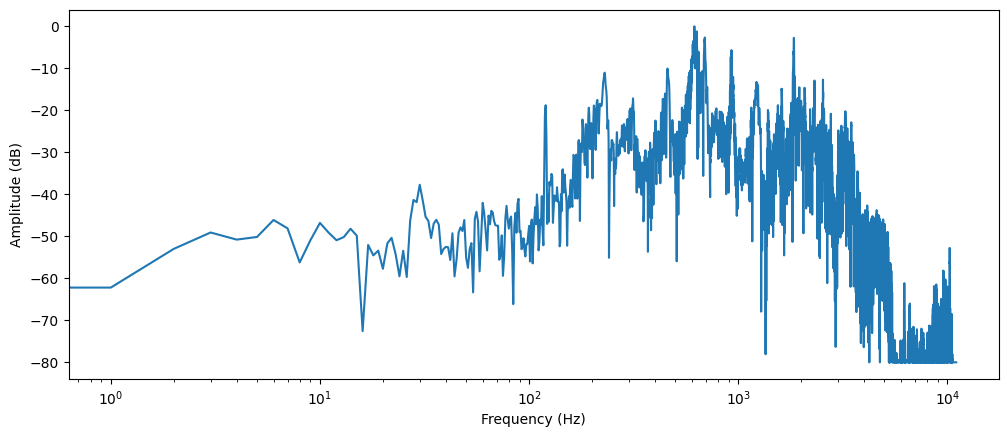

In [12]:
dft_input = data[:sampling_rate]  # First 1 second

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# Taking the magnitude with np.abs(dft) extracts the amplitude information from the spectrogram
amplitude = np.abs(dft)
# get the amplitude spectrum in decibels
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# Spectrogram

A spectrogram plots the frequency content of an audio signal as it changes over time by taking multiple DFTs. The algorithm that performs this computation is the STFT or Short Time Fourier Transform. 

The spectrogram is created by taking short segments of the audio signal, typically lasting a few milliseconds, and calculating the discrete Fourier transform of each segment to obtain its frequency spectrum. The resulting spectra are then stacked together on the time axis to create the spectrogram. Each vertical slice in this image corresponds to a single frequency spectrum, seen from the top. By default, librosa.stft() splits the audio signal into segments of 2048 samples, which gives a good trade-off between frequency resolution and time resolution.

When working with a music recording, you can see the various instruments and vocal tracks and how they contribute to the overall sound. In speech, you can identify different vowel sounds as each vowel is characterized by particular frequencies.

The intensity of the color on the left gives the amplitude or power of the frequency component at each point in time, measured in decibels (dB).

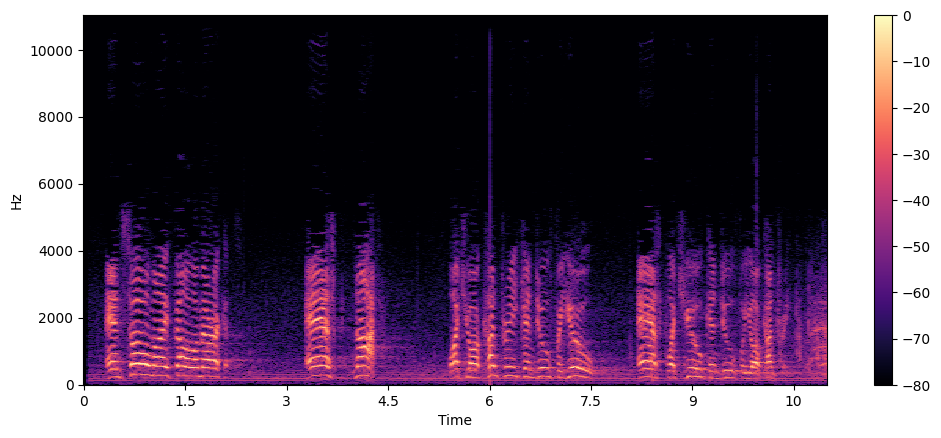

In [14]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

# Mel spectrogram

The mel scale is a perceptual scale that approximates the non-linear frequency response of the human ear. Because human auditory system is more sensitive to changes in lower frequencies than higher frequencies, and this **sensitivity decreases logarithmically as frequency increases**. Hence, compared to a standard spectrogram where **the frequency axis is linear**, a mel spectrogram can capture more meaningful features of the audio signal for human perception, making it a popular choice in tasks such as speech recognition, speaker identification, and music genre classification.

To create a mel spectrogram, the STFT is used just like before, splitting the audio into short segments to obtain a sequence of frequency spectra. Additionally, each spectrum is sent through a set of filters, the so-called mel filterbank, to transform the frequencies to the mel scale.

**Creating a mel spectrogram is a lossy operation as it involves filtering the signal.**

Just as with a regular spectrogram, it’s common practice to express the strength of the mel frequency components in decibels. This is commonly referred to as a log-mel spectrogram, because the conversion to decibels involves a logarithmic operation. The above example used librosa.power_to_db() as librosa.feature.melspectrogram() creates a power spectrogram.

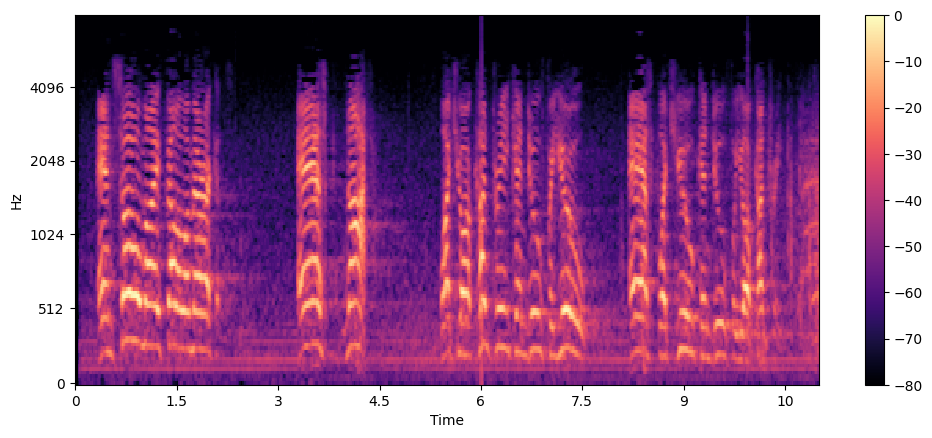

In [17]:
# n_mels stands for the number of mel bands to generate. The mel bands define a set of frequency ranges 
# that divide the spectrum into perceptually meaningful components, using a set of filters whose shape 
# and spacing are chosen to mimic the way the human ear responds to different frequencies. 
# Common values for n_mels are 40 or 80. fmax indicates the highest frequency (in Hz) we care about.
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()